In [1]:
import numpy as np

from pi_maker import jitter_sin

lons, lats = np.vectorize(jitter_sin)(np.arange(1000))

In [2]:
# Wrap around longitudes to be within -180 to 180 degrees
raw_lons = lons.copy()
lons = (lons + 180) % 360 - 180

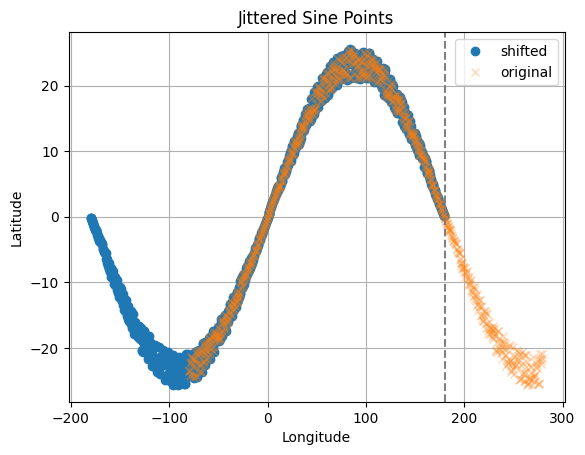

In [3]:
import matplotlib.pyplot as plt

plt.plot(lons, lats, "o", label="shifted")
plt.plot(raw_lons, lats, "x", alpha=0.3, label="original")
plt.axvline(180, color="gray", linestyle="--")
plt.title("Jittered Sine Points")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid()
plt.legend()
plt.show()

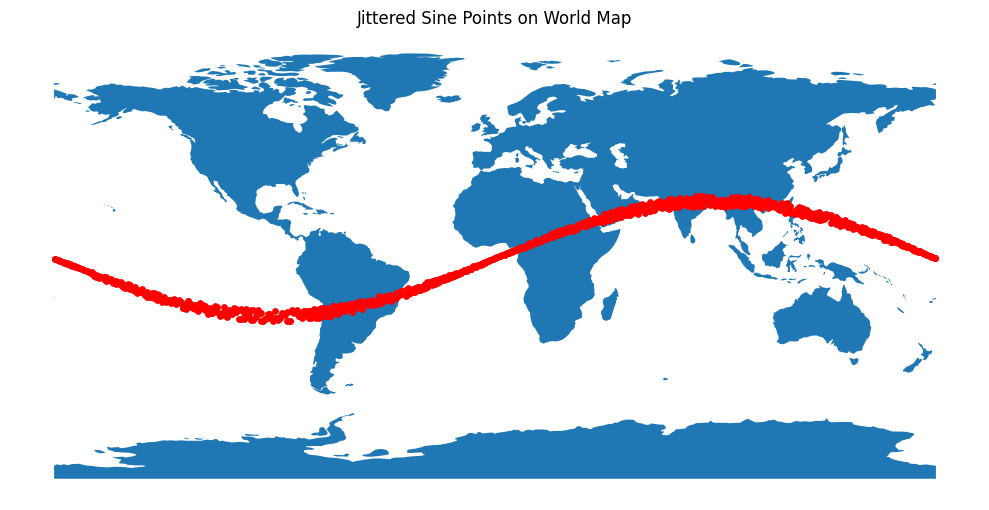

In [4]:
import geodatasets
import geopandas as gpd
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(lons, lats, strict=True)]
gdf = gpd.GeoDataFrame({"Longitude": lons, "Latitude": lats}, geometry=geometry)

world = gpd.read_file(geodatasets.data.naturalearth.land["url"])
gdf.plot(ax=world.plot(figsize=(10, 6)), marker="o", color="red", markersize=15)
plt.title("Jittered Sine Points on World Map")
plt.gca().axis("off")
plt.tight_layout()
plt.savefig("jittered_sine_world_map.png", dpi=150)
plt.show()